# Demo of Lambert W function in torch

This notebook illustrates the implementation of the `lambertw` function as a native `torch` implementation.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Only run if not already on PYTHONPATH / venv
import os
import sys
import pathlib
from os.path import dirname
parent_path = dirname(pathlib.Path(pathlib.Path(os.getcwd())))

if parent_path not in sys.path:
    sys.path.insert(0, parent_path)

In [3]:
import torch
import scipy.special
import numpy as np

# import module for demo
import torchlambertw as tlw
import torchlambertw.special

## Some data examples

Here are some examples of applying the W(z) function to z. 

See wiki page for some known identities, e.g., `W(0) = 0` or `W(-exp(-1)) = -1`.

In [4]:
for z in [0, 1, tlw.special._M_EXP_INV + 1e-6]:
    print("z = %f; scipy W(z) = %f; torch W(z) = %f" % 
          (z, 
           scipy.special.lambertw(z).real,
           tlw.special.lambertw(torch.tensor([z])).numpy()))

z = 0.000000; scipy W(z) = 0.000000; torch W(z) = 0.000000
z = 1.000000; scipy W(z) = 0.567143; torch W(z) = 0.567143
z = -0.367878; scipy W(z) = -0.997670; torch W(z) = -0.997671


In [5]:
arr = [[0, 1, 2], [-1, 3, 4.]]
arr_t = torch.tensor(arr)
tlw.special.lambertw(arr_t)

tensor([[0.0000, 0.5671, 0.8526],
        [   nan, 1.0499, 1.2022]])

In [6]:
arr = [-1, 2.,-0.25, tlw.special._M_EXP_INV, np.inf, 0.]
arr_t = torch.tensor(arr)
arr_t

tensor([-1.0000,  2.0000, -0.2500, -0.3679,     inf,  0.0000],
       dtype=torch.float64)

In [7]:
# Compute principal branch (k=0)
tlw.special.lambertw(arr_t, k=0)

tensor([    nan,  0.8526, -0.3574, -1.0000,     inf,  0.0000])

In [8]:
# first item is not real number; remaining match lambertw implementation
scipy.special.lambertw(arr)

array([-0.31813151+1.3372357j,  0.8526055 +0.j       ,
       -0.35740296+0.j       ,         nan      +nanj,
               inf+0.j       ,  0.        +0.j       ])

In [9]:
# Compute non-principal branch (k=-1)
tlw.special.lambertw(arr_t, k=-1)

tensor([    nan,     nan, -2.1533, -1.0000,     nan,    -inf])

## Plot Lambert W function

See here for an example of how to replicate the figure on the [Lambert W Function](https://en.wikipedia.org/wiki/Lambert_W_function) Wikipedia page:

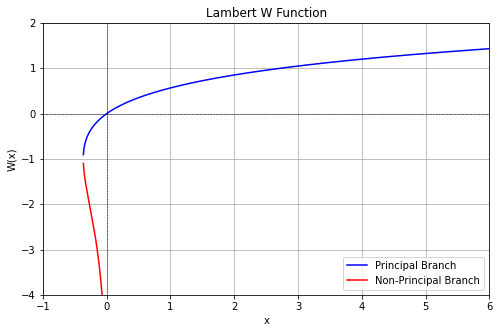

In [10]:
# plot lambertw function

import numpy as np
import matplotlib.pyplot as plt

def plot_lambertW(range_start, range_end, num_points=2000):
    x_values = np.linspace(range_start, range_end, num_points)
    x_values_torch = torch.tensor(x_values)
    principal_branch_values = tlw.special.lambertw(x_values_torch, k=0).numpy()
    non_principal_branch_values = tlw.special.lambertw(x_values_torch, k=-1).numpy()
    
    plt.figure(figsize=(8, 5))
    plt.plot(x_values, principal_branch_values, label="Principal Branch", color='blue')
    plt.plot(x_values, non_principal_branch_values, label="Non-Principal Branch", color='red')
    
    plt.title("Lambert W Function")
    plt.xlabel("x")
    plt.ylabel("W(x)")
    plt.xlim(range_start, range_end)
    plt.ylim(-4, 2)  # same range as wiki figure
    plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
    plt.axvline(0, color='black', linestyle='--', linewidth=0.5)
    plt.legend()
    
    plt.grid(True)
    plt.show()

# Example usage:
plot_lambertW(-1, 6)
